# import Libraries

In [1]:
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Random forest classifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from sklearn.metrics import multilabel_confusion_matrix,accuracy_score,classification_report,confusion_matrix

from sklearn.tree import DecisionTreeClassifier,plot_tree


# Problem Statement

# Data Gathering

In [2]:
df = pd.read_csv(r"C:\Users\yashraj\Desktop\itVedant\Machine Learning\Placement Prediction\Students Placement .csv")
df

,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,60.00,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,67.00,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,66.00,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


# EDA (Exploratory Data Analysis)

In [3]:
# Size

df.shape

(215, 10)

In [4]:
# check for info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   hsc_p           215 non-null    float64
 3   degree_p        215 non-null    float64
 4   degree_t        215 non-null    object 
 5   workex          215 non-null    object 
 6   etest_p         215 non-null    float64
 7   specialisation  215 non-null    object 
 8   mba_p           215 non-null    float64
 9   status          215 non-null    object 
dtypes: float64(5), object(5)
memory usage: 16.9+ KB


In [5]:
# Check For stats

df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [6]:
gender_counts = df['gender'].value_counts()

([<matplotlib.patches.Wedge at 0x1d06d239ff0>,
 [Text(-0.48861869663963653, 0.9855210648657812, 'M'),
  Text(0.488618696639636, -0.9855210648657814, 'F')],
 [Text(-0.26651928907616534, 0.5375569444722442, '64.7%'),
  Text(0.26651928907616507, -0.5375569444722443, '35.3%')])

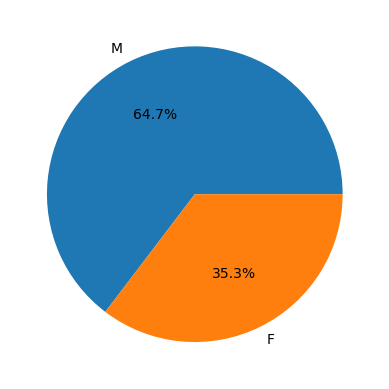

In [7]:
plt.pie(gender_counts, labels=gender_counts.index ,autopct='%1.1f%%')

### Visualizing data

<Axes: xlabel='ssc_p', ylabel='Density'>

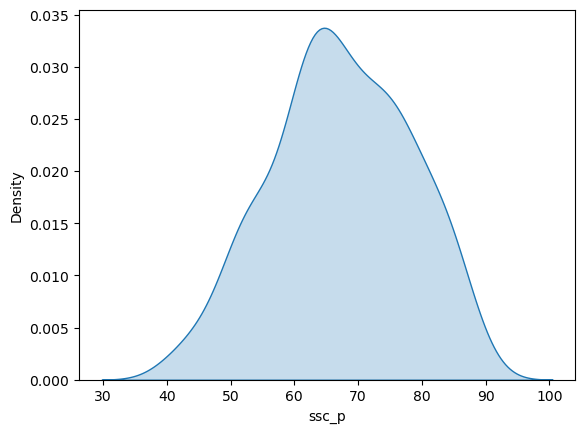

In [8]:
sns.kdeplot(df["ssc_p"],fill=True)

<Axes: xlabel='hsc_p', ylabel='Density'>

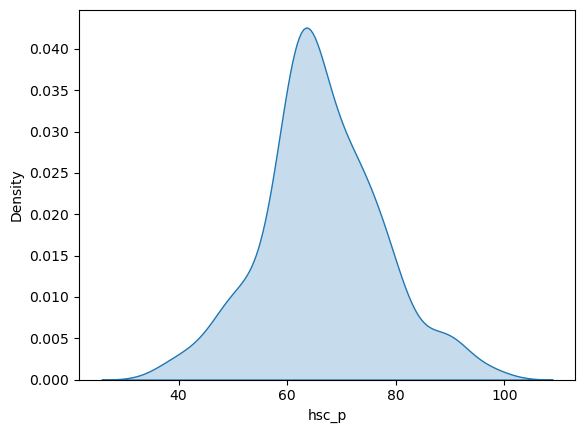

In [9]:
sns.kdeplot(df["hsc_p"],fill=True)

<Axes: xlabel='degree_p', ylabel='Density'>

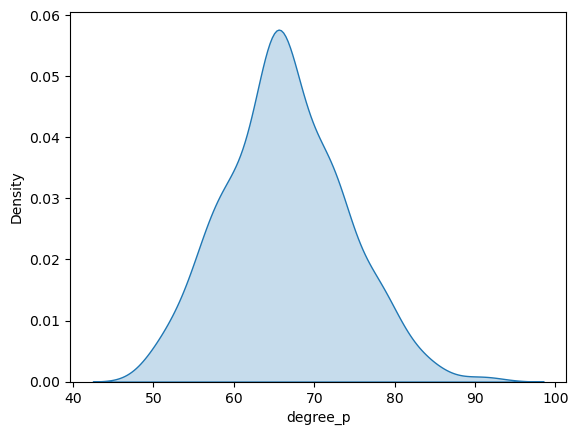

In [10]:
sns.kdeplot(df["degree_p"],fill=True)

<Axes: ylabel='etest_p'>

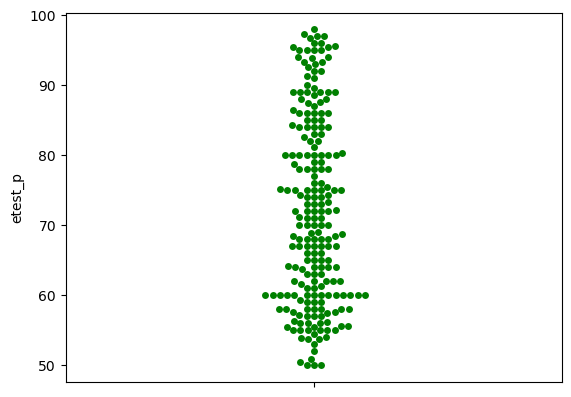

In [11]:
sns.swarmplot(df["etest_p"],color="green")

<Axes: xlabel='mba_p', ylabel='Count'>

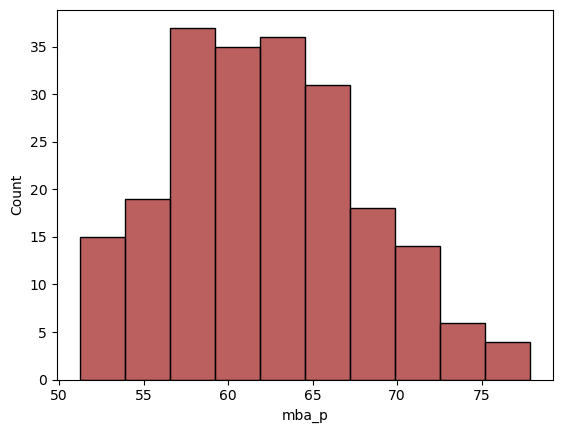

In [12]:
sns.histplot(df["mba_p"],color="brown")

In [13]:
# Checking for missing values

df.isnull().sum()  # Zero missing values

gender            0
ssc_p             0
hsc_p             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [14]:
 # checking for unique values in target column

df["status"].unique()

array(['Placed', 'Not Placed'], dtype=object)

<Axes: xlabel='status', ylabel='count'>

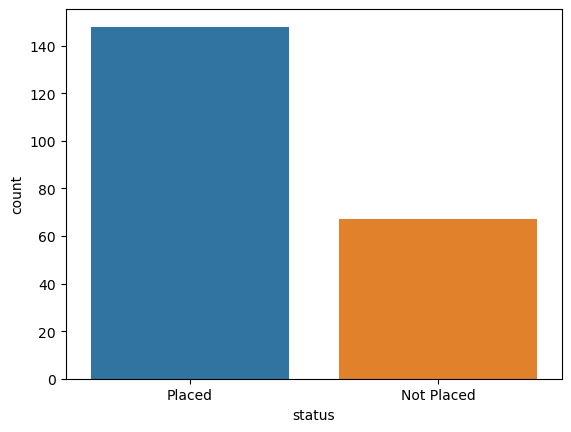

In [15]:
# Count of placed and not placed students

sns.countplot(x=df["status"],)

### checking for outliers

<Axes: >

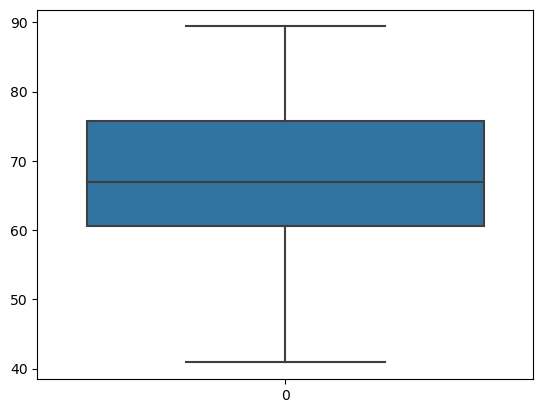

In [16]:
sns.boxplot(df["ssc_p"])  # no outliers

<Axes: >

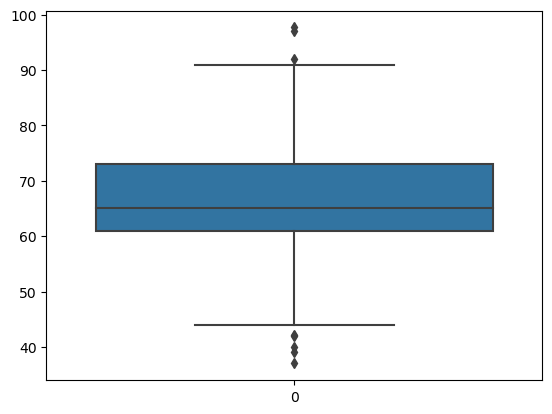

In [17]:
sns.boxplot(df["hsc_p"]) # outliers are present

In [18]:
# Finding Outliers

q1h = df["hsc_p"].quantile(.25)
q2h = df["hsc_p"].quantile(.50)
q3h = df["hsc_p"].quantile(.75)

iqr_h = q3h-q1h

upper_tailh = q3h+1.5*iqr_h
lower_tailh = q1h-1.5*iqr_h

In [19]:
upper_tailh

91.15

In [20]:
lower_tailh

42.75

In [21]:
df[df["hsc_p"] > upper_tailh]

,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
24,M,76.50,97.7,78.86,Sci&Tech,No,97.4,Mkt&Fin,74.01,Placed
134,F,77.44,92.0,72.00,Comm&Mgmt,Yes,94.0,Mkt&Fin,67.13,Placed
177,F,73.00,97.0,79.00,Comm&Mgmt,Yes,89.0,Mkt&Fin,70.81,Placed


In [22]:
df[df["hsc_p"] < lower_tailh]

,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
42,M,49.00,39.00,65.00,Others,No,63.00,Mkt&Fin,51.21,Not Placed
49,F,50.00,37.00,52.00,Others,No,65.00,Mkt&HR,56.11,Not Placed
120,M,58.00,40.00,59.00,Comm&Mgmt,No,73.00,Mkt&HR,58.81,Not Placed
169,M,59.96,42.16,61.26,Sci&Tech,No,54.48,Mkt&HR,65.48,Not Placed
206,M,41.00,42.00,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed


<Axes: >

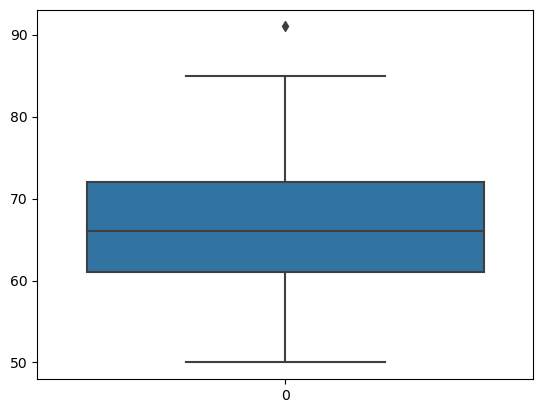

In [23]:
sns.boxplot(df["degree_p"]) # outliers above upper tail

In [24]:
# Finding Outliers

q1d = df["degree_p"].quantile(.25)
q2d = df["degree_p"].quantile(.50)
q3d = df["degree_p"].quantile(.75)

iqr_d = q3d-q1d

upper_taild = q3d+1.5*iqr_d
lower_taild = q1d-1.5*iqr_d

In [25]:
df[df["degree_p"] > upper_taild]

,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
197,F,83.96,53.0,91.0,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed


<Axes: >

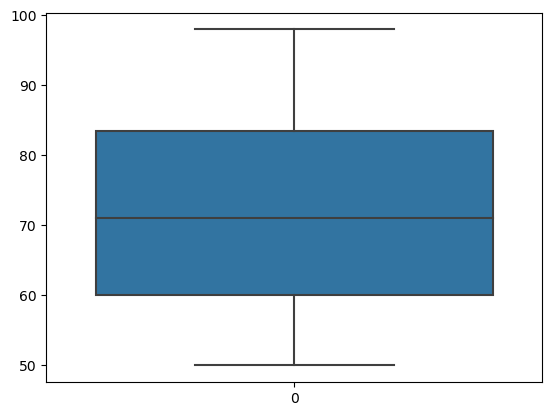

In [26]:
sns.boxplot(df["etest_p"])  # no outliers

<Axes: >

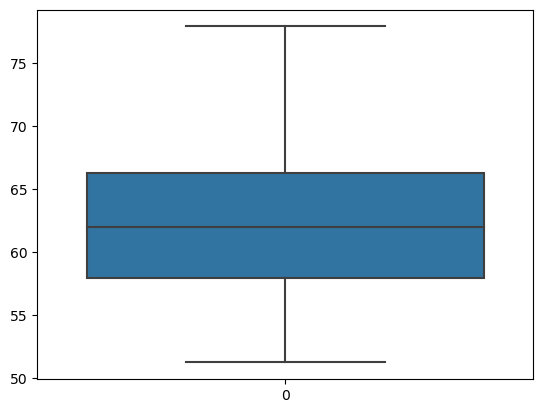

In [27]:
sns.boxplot(df["mba_p"])   # no outliers

In [28]:
# Checking for skewness

In [29]:
skewness = df.skew
skewness()

C:\Users\yashraj\AppData\Local\Temp\ipykernel_11228\2071310463.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness()


ssc_p      -0.132649
hsc_p       0.163639
degree_p    0.244917
etest_p     0.282308
mba_p       0.313576
dtype: float64

# Feature Engineering

In [30]:
# 1) handling outliers of hcs_p by replacing them with mean percentage of hsc

In [31]:
df[(df["hsc_p"]<upper_tailh) & (df["hsc_p"] > lower_tailh)]  # data without outliers

,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,60.00,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,67.00,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,66.00,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [32]:
# now we will replace the outliers with mean of the above data 

In [33]:
mean_without_outliers_h = df[(df["hsc_p"]<upper_tailh) & (df["hsc_p"] > lower_tailh)]["hsc_p"].mean()

mean_without_outliers_h

66.54478260869566

In [34]:
# Replacing the outliers

df.loc[df["hsc_p"] > upper_tailh,"hsc_p"] = mean_without_outliers_h
df.loc[df["hsc_p"] < lower_tailh,"hsc_p"] = mean_without_outliers_h
df

,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,60.00,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,67.00,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,66.00,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


<Axes: >

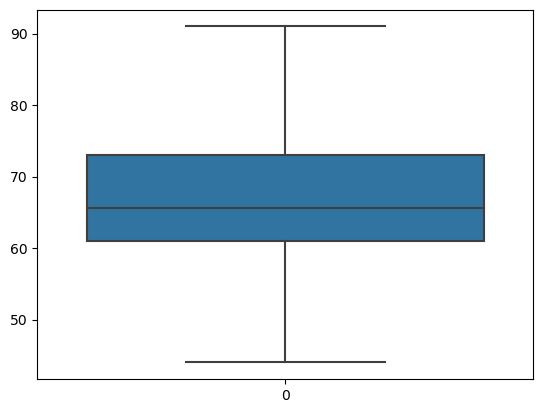

In [35]:
sns.boxplot(df["hsc_p"])  # Outliers replaced

In [36]:
# converting degree_t

In [37]:
df["degree_t"].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [38]:
df["degree_t"].replace({"Sci&Tech":0,"Comm&Mgmt":1,"Others":2},inplace=True)
df

,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,58.00,0,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,77.48,0,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,64.00,1,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,52.00,0,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,73.30,1,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,77.60,1,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,60.00,72.00,0,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,67.00,73.00,1,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,66.00,58.00,1,No,70.0,Mkt&HR,60.23,Placed


In [39]:
# converting workex

In [40]:
df["workex"].unique()

array(['No', 'Yes'], dtype=object)

In [41]:
df["workex"].replace({"No":0,"Yes":1},inplace=True)
df

,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,58.00,0,0,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,77.48,0,1,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,64.00,1,0,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,52.00,0,0,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,73.30,1,0,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,77.60,1,0,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,60.00,72.00,0,0,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,67.00,73.00,1,1,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,66.00,58.00,1,0,70.0,Mkt&HR,60.23,Placed


In [42]:
# converting specialisation

In [43]:
df["specialisation"].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [44]:
df["specialisation"].replace({"Mkt&HR":0,"Mkt&Fin":1},inplace=True)
df

,gender,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,58.00,0,0,55.0,0,58.80,Placed
1,M,79.33,78.33,77.48,0,1,86.5,1,66.28,Placed
2,M,65.00,68.00,64.00,1,0,75.0,1,57.80,Placed
3,M,56.00,52.00,52.00,0,0,66.0,0,59.43,Not Placed
4,M,85.80,73.60,73.30,1,0,96.8,1,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,77.60,1,0,91.0,1,74.49,Placed
211,M,58.00,60.00,72.00,0,0,74.0,1,53.62,Placed
212,M,67.00,67.00,73.00,1,1,59.0,1,69.72,Placed
213,F,74.00,66.00,58.00,1,0,70.0,0,60.23,Placed


In [45]:
# We don't need the gender column for the prediction 

df.drop(columns=['gender'], inplace=True)
df

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,58.00,0,0,55.0,0,58.80,Placed
1,79.33,78.33,77.48,0,1,86.5,1,66.28,Placed
2,65.00,68.00,64.00,1,0,75.0,1,57.80,Placed
3,56.00,52.00,52.00,0,0,66.0,0,59.43,Not Placed
4,85.80,73.60,73.30,1,0,96.8,1,55.50,Placed
...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,1,0,91.0,1,74.49,Placed
211,58.00,60.00,72.00,0,0,74.0,1,53.62,Placed
212,67.00,67.00,73.00,1,1,59.0,1,69.72,Placed
213,74.00,66.00,58.00,1,0,70.0,0,60.23,Placed


In [46]:
# Converting the status column to numerical :-

In [47]:
df["status"].replace({"Not Placed":0,"Placed":1},inplace=True)
df

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,58.00,0,0,55.0,0,58.80,1
1,79.33,78.33,77.48,0,1,86.5,1,66.28,1
2,65.00,68.00,64.00,1,0,75.0,1,57.80,1
3,56.00,52.00,52.00,0,0,66.0,0,59.43,0
4,85.80,73.60,73.30,1,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,1,0,91.0,1,74.49,1
211,58.00,60.00,72.00,0,0,74.0,1,53.62,1
212,67.00,67.00,73.00,1,1,59.0,1,69.72,1
213,74.00,66.00,58.00,1,0,70.0,0,60.23,1


# Feature Selection

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ssc_p           215 non-null    float64
 1   hsc_p           215 non-null    float64
 2   degree_p        215 non-null    float64
 3   degree_t        215 non-null    int64  
 4   workex          215 non-null    int64  
 5   etest_p         215 non-null    float64
 6   specialisation  215 non-null    int64  
 7   mba_p           215 non-null    float64
 8   status          215 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 15.2 KB


In [49]:

df.corr() 

,ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
ssc_p,1.000000,0.458916,0.538404,-0.215745,0.175675,0.261993,0.172536,0.388478,0.607889
hsc_p,0.458916,1.000000,0.373726,0.058139,0.087776,0.202632,0.217347,0.283003,0.437711
degree_p,0.538404,0.373726,1.000000,-0.180624,0.122648,0.224470,0.218286,0.402364,0.479861
degree_t,-0.215745,0.058139,-0.180624,1.000000,-0.083505,-0.005386,0.014103,-0.121357,-0.056572
workex,0.175675,0.087776,0.122648,-0.083505,1.000000,0.056735,0.191174,0.168811,0.276060
etest_p,0.261993,0.202632,0.224470,-0.005386,0.056735,1.000000,0.236315,0.218055,0.127639
specialisation,0.172536,0.217347,0.218286,0.014103,0.191174,0.236315,1.000000,0.105728,0.250655
mba_p,0.388478,0.283003,0.402364,-0.121357,0.168811,0.218055,0.105728,1.000000,0.076922
status,0.607889,0.437711,0.479861,-0.056572,0.276060,0.127639,0.250655,0.076922,1.000000


<Axes: >

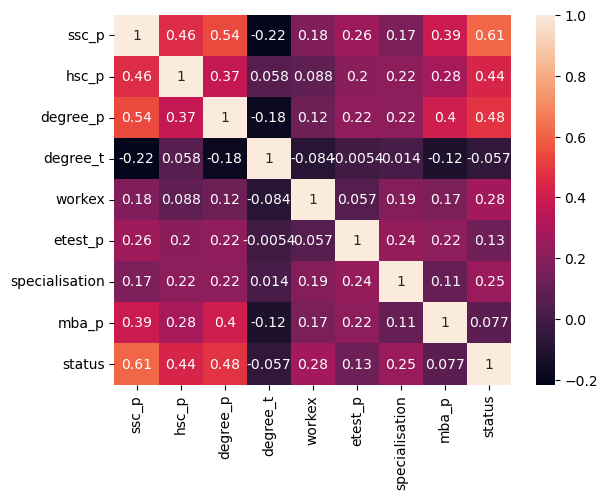

In [50]:
sns.heatmap(df.corr(), annot=True)

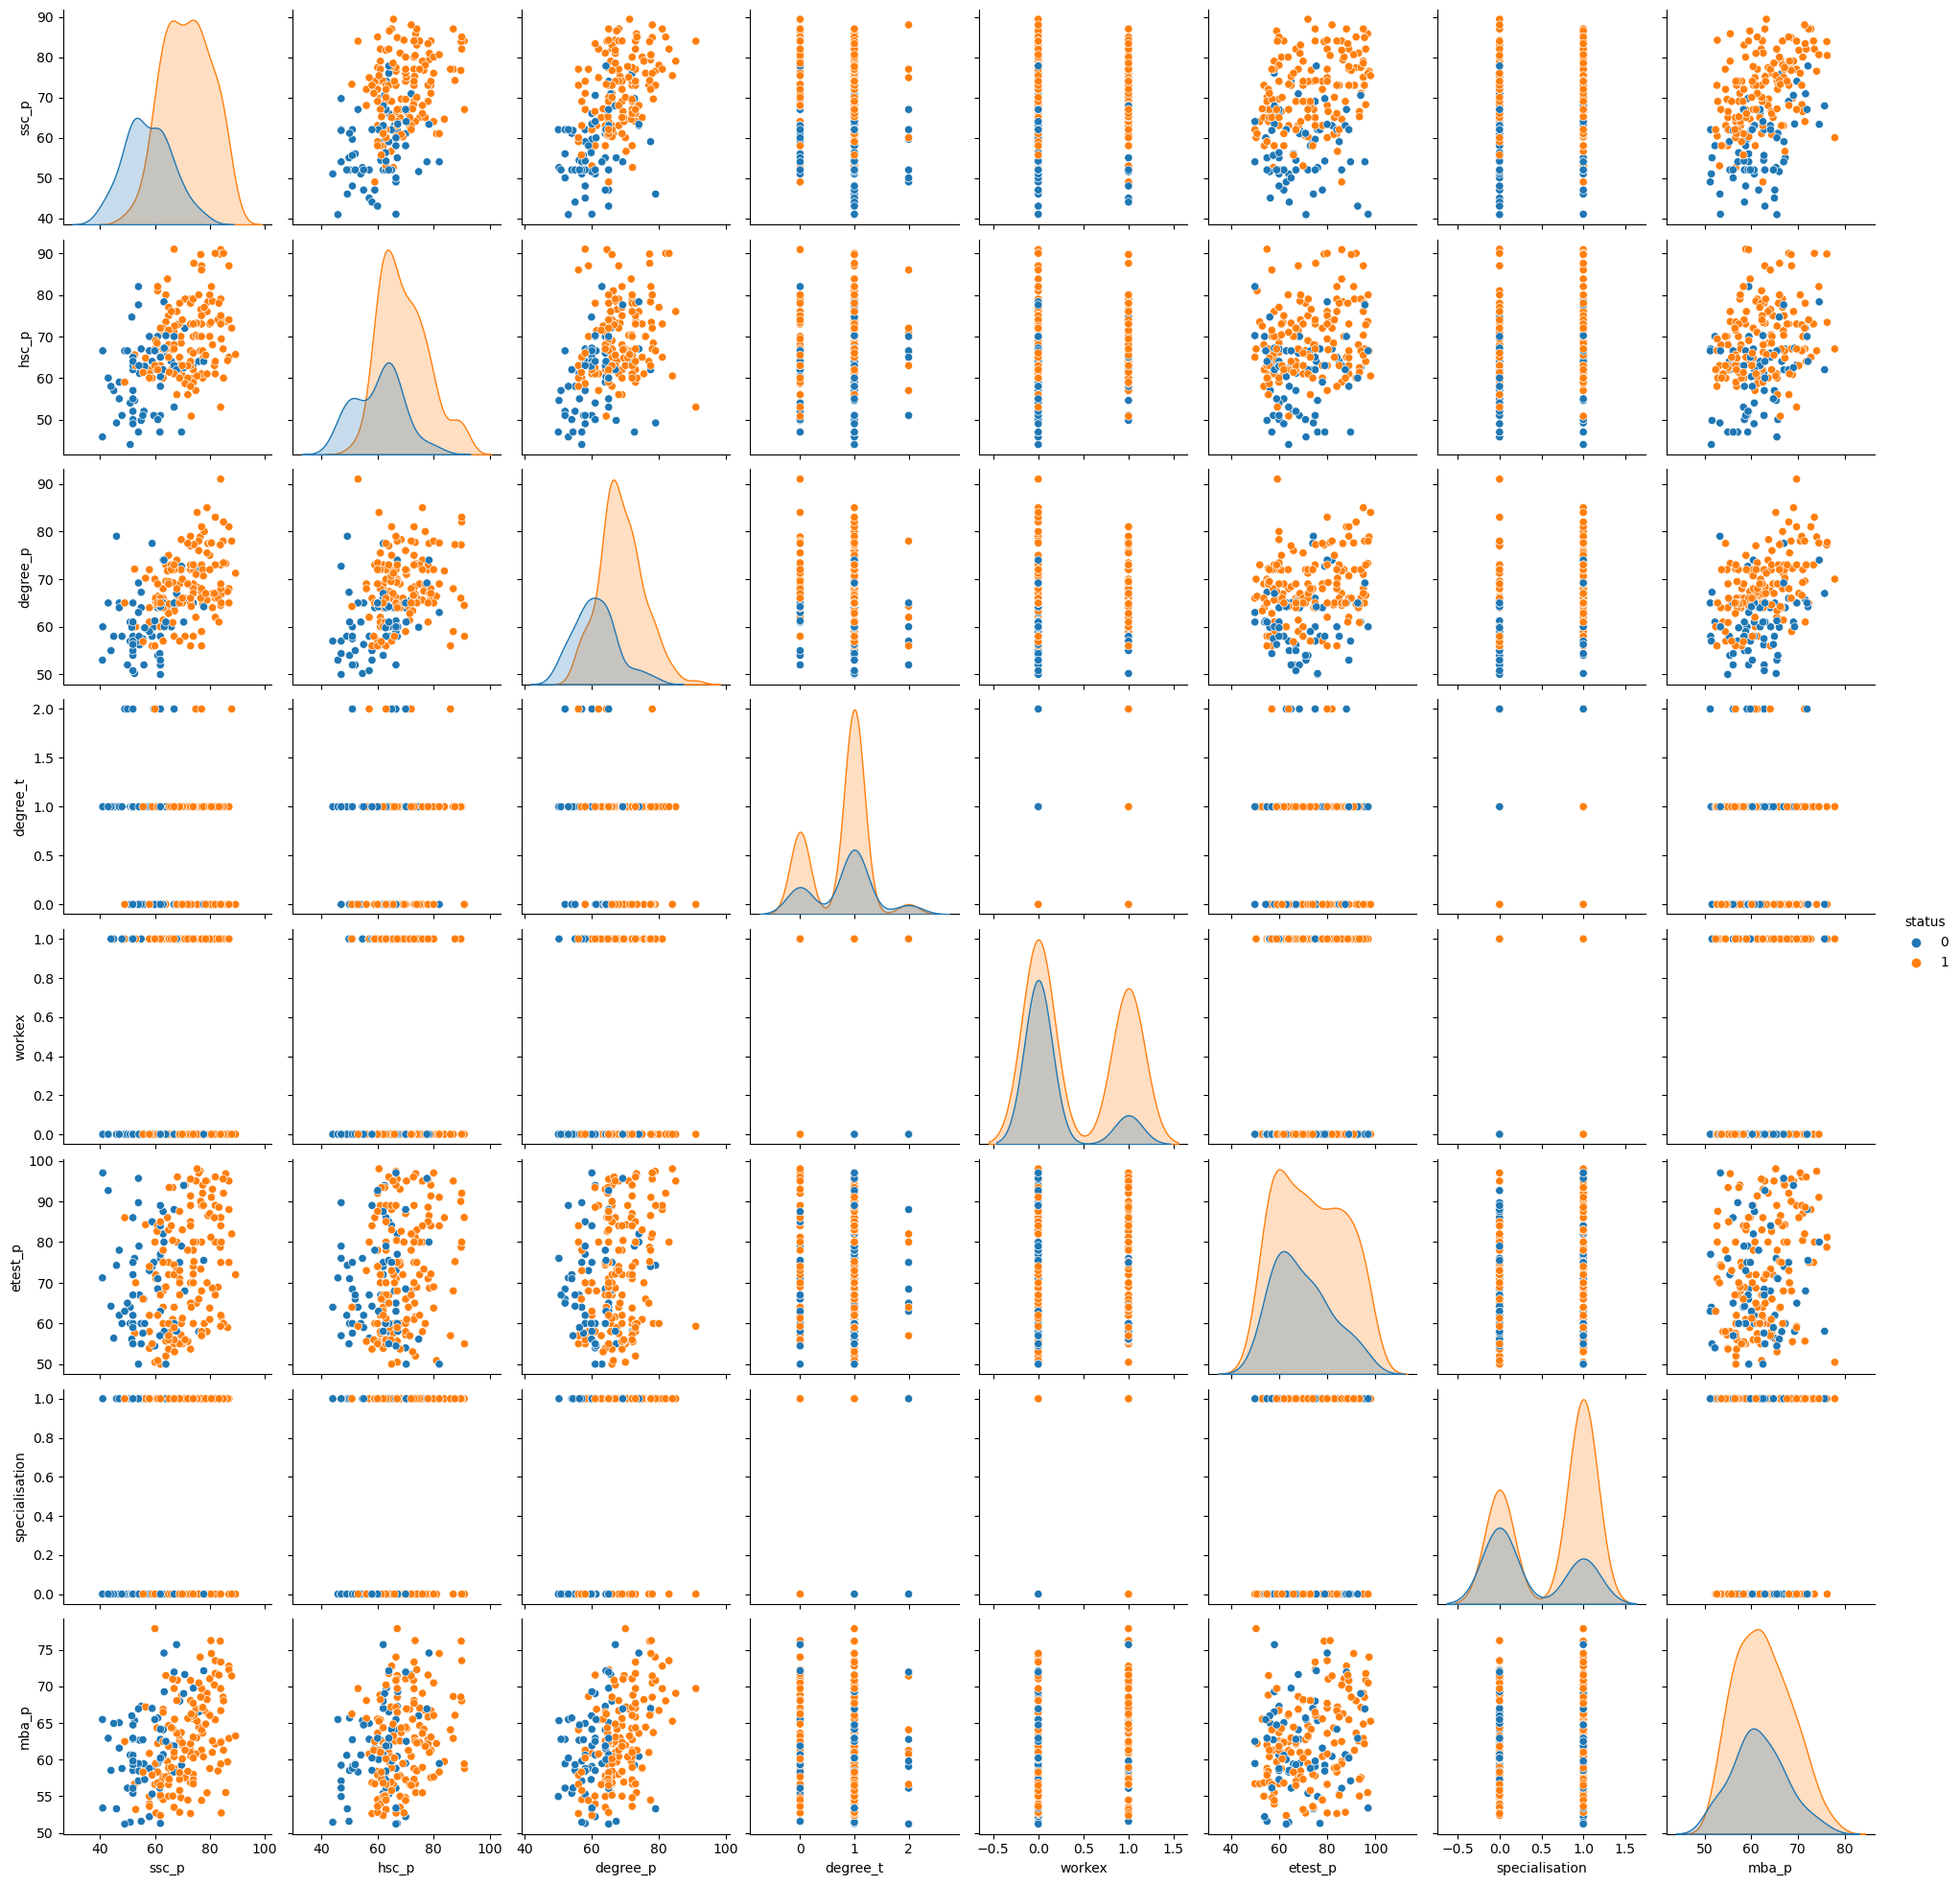

In [53]:
sns.pairplot(df,hue = "status")

## Assumption :- No Multicolinearity

In [130]:
vif_df = pd.DataFrame()

df1 = df.iloc[:,:8]

vif_df["features"]=df1.columns
vif_df

,features
0,ssc_p
1,hsc_p
2,degree_p
3,degree_t
4,workex
5,etest_p
6,specialisation
7,mba_p


In [131]:
vif_list=[]

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
    
vif_list

[69.12813137264095,
 67.80722818309661,
 114.83368042384735,
 3.344220626453616,
 1.6352444545821814,
 33.89455499776817,
 2.5446116709718916,
 105.08906008517936]

In [132]:
vif_df["vif"]=vif_list
vif_df

,features,vif
0,ssc_p,69.128131
1,hsc_p,67.807228
2,degree_p,114.833680
3,degree_t,3.344221
4,workex,1.635244
5,etest_p,33.894555
6,specialisation,2.544612
7,mba_p,105.089060


## Train test split

In [133]:
# Splitting the data :-

In [134]:
x = df1   # independent features
y = df["status"]  # dependent features

In [135]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

# Model Training

## Algorithm 1: Logistic Regression

In [57]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [58]:
log_reg_model = log_reg.fit(xtrain,ytrain)
log_reg_model

C:\Users\yashraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [59]:
ytrain

184    0
117    1
101    1
85     1
129    1
      ..
19     1
55     1
192    1
21     1
206    0
Name: status, Length: 172, dtype: int64

In [60]:
ytrain_predict = log_reg_model.predict(xtrain)
ytrain_predict

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [61]:
# On training data

In [62]:
accuracy = accuracy_score(ytrain,ytrain_predict)
print("Accuracy : ", accuracy)

print("-"*50)

print(multilabel_confusion_matrix(ytrain,ytrain_predict))
print("-"*50)

clf_rep = classification_report(ytrain,ytrain_predict)
print(clf_rep)

Accuracy :  0.8837209302325582
--------------------------------------------------
[[[111   8]
  [ 12  41]]

 [[ 41  12]
  [  8 111]]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        53
           1       0.90      0.93      0.92       119

    accuracy                           0.88       172
   macro avg       0.87      0.85      0.86       172
weighted avg       0.88      0.88      0.88       172



In [63]:
# on testing data

In [64]:
ytest_predict = log_reg_model.predict(xtest)
ytest_predict

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [65]:
accuracy = accuracy_score(ytest,ytest_predict)
print("Accuracy : ", accuracy)

print("-"*50)

print(multilabel_confusion_matrix(ytest,ytest_predict))
print("-"*50)

clf_rep = classification_report(ytest,ytest_predict)
print(clf_rep)

Accuracy :  0.8604651162790697
--------------------------------------------------
[[[28  1]
  [ 5  9]]

 [[ 9  5]
  [ 1 28]]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.85      0.97      0.90        29

    accuracy                           0.86        43
   macro avg       0.87      0.80      0.83        43
weighted avg       0.87      0.86      0.85        43



## Algorithm 2 : Decision tree

In [66]:
dt_clf = DecisionTreeClassifier()
dt_clf_model = dt_clf.fit(xtrain,ytrain)
dt_clf_model

DecisionTreeClassifier()

# Model evaluation

In [67]:
## For Training Data

ytrain_pred = dt_clf_model.predict(xtrain)

Accuracy : 1.0
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00       119

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



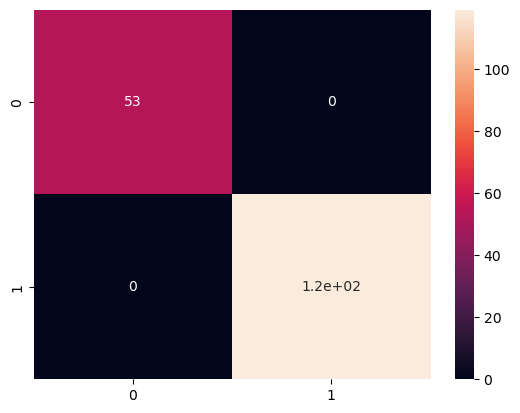

In [68]:

acc = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot = True)

clf_rpt = classification_report(ytrain,ytrain_pred)
print(f"Classification Report : \n",clf_rpt)

[Text(0.34692028985507245, 0.9444444444444444, 'x[0] <= 56.44\ngini = 0.426\nsamples = 172\nvalue = [53, 119]\nclass = Not Placed'),
 Text(0.11594202898550725, 0.8333333333333334, 'x[7] <= 58.41\ngini = 0.225\nsamples = 31\nvalue = [27, 4]\nclass = Placed'),
 Text(0.057971014492753624, 0.7222222222222222, 'x[0] <= 52.3\ngini = 0.42\nsamples = 10\nvalue = [7, 3]\nclass = Placed'),
 Text(0.028985507246376812, 0.6111111111111112, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Placed'),
 Text(0.08695652173913043, 0.6111111111111112, 'x[7] <= 56.88\ngini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = Not Placed'),
 Text(0.057971014492753624, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Not Placed'),
 Text(0.11594202898550725, 0.5, 'x[7] <= 57.795\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Placed'),
 Text(0.08695652173913043, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Placed'),
 Text(0.14492753623188406, 0.3888888888888889, 'gini = 0.0\nsamples 

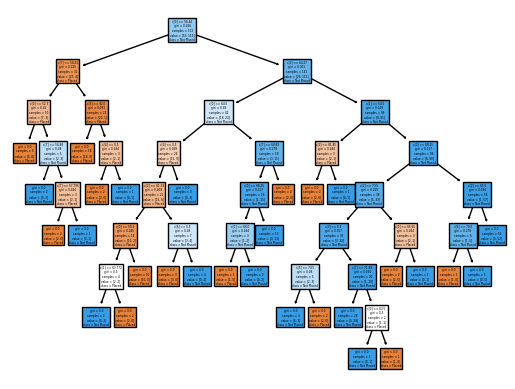

In [69]:
plot_tree(dt_clf_model,filled=True,class_names=["Placed","Not Placed"])

In [70]:
## For Testing Data

ytest_pred = dt_clf_model.predict(xtest)

Accuracy : 0.8372093023255814
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.84      0.93      0.89        29

    accuracy                           0.84        43
   macro avg       0.83      0.79      0.80        43
weighted avg       0.84      0.84      0.83        43



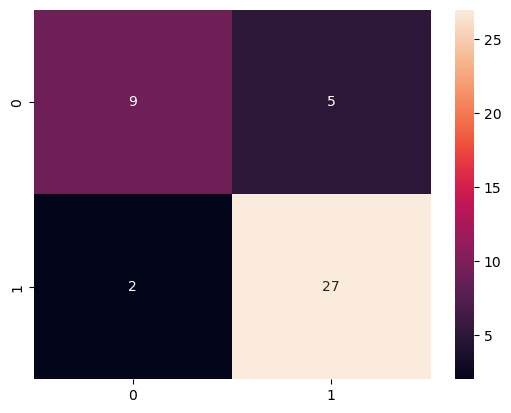

In [71]:


acc = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytest,ytest_pred),annot = True)

clf_rpt = classification_report(ytest,ytest_pred)
print(f"Classification Report : \n",clf_rpt)

## Decision Tree By using Hyperparameter Tunning

In [154]:
# 1) Hyper parameter tunning

hyperparameters = {"criterion" : ["entropy","gini"],
                  "max_depth" : np.arange(2,15),
                  "min_samples_split" : np.arange(3,15),
                  "min_samples_leaf" : np.arange(2,10)}

In [155]:
gscv = GridSearchCV(dt_clf_model,hyperparameters,cv=4)
gscv.fit(xtrain,ytrain)

NameError: name 'dt_clf_model' is not defined

In [74]:
gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=3)

In [75]:
dt_clf_hyp = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=3)

In [76]:
dt_clf_hyp_model = dt_clf_hyp.fit(xtrain,ytrain)
dt_clf_hyp_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=3)

### Evaluating after hyper parameter application :-

In [77]:
## For Training Data


ytrain_pred = dt_clf_hyp_model.predict(xtrain)

Accuracy : 0.9127906976744186
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        53
           1       0.93      0.94      0.94       119

    accuracy                           0.91       172
   macro avg       0.90      0.90      0.90       172
weighted avg       0.91      0.91      0.91       172



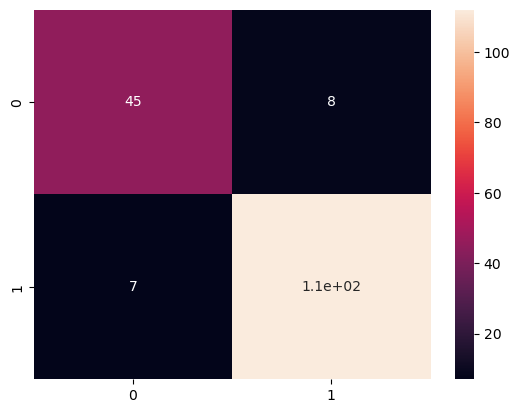

In [78]:

acc = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot = True)

clf_rpt = classification_report(ytrain,ytrain_pred)
print(f"Classification Report : \n",clf_rpt)

In [79]:
## For Testing Data

ytest_pred = dt_clf_hyp_model.predict((xtest))

Accuracy : 0.8372093023255814
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.82      0.97      0.89        29

    accuracy                           0.84        43
   macro avg       0.86      0.77      0.79        43
weighted avg       0.84      0.84      0.83        43



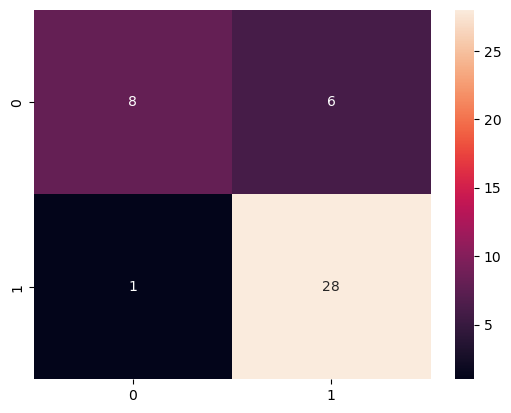

In [80]:

acc = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytest,ytest_pred),annot = True)

clf_rpt = classification_report(ytest,ytest_pred)
print(f"Classification Report : \n",clf_rpt)

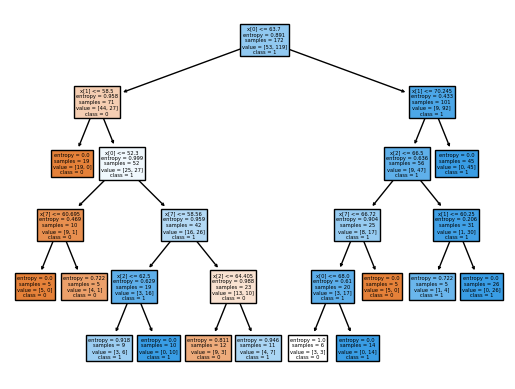

In [81]:
plot_tree(dt_clf_hyp_model,class_names=["0","1"], filled=True)
plt.savefig("dt_hyp.png")

## Ensemble method

## Algorithm 3: Random Forest

## Model Training

In [82]:
rf_clf = RandomForestClassifier()
rf_clf

RandomForestClassifier()

In [83]:
rf_clf_model = rf_clf.fit(xtrain,ytrain)
rf_clf_model

RandomForestClassifier()

## Model Evaluation

In [84]:
ytrain

184    0
117    1
101    1
85     1
129    1
      ..
19     1
55     1
192    1
21     1
206    0
Name: status, Length: 172, dtype: int64

In [85]:
ytrain_pred_r = rf_clf_model.predict(xtrain)
ytrain_pred_r

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Accuracy : 1.0
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00       119

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172

************************************************************


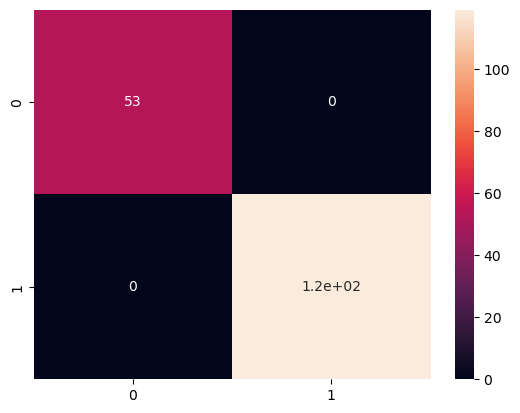

In [86]:
## For Training Data

acc_rf = accuracy_score(ytrain,ytrain_pred_r)
print(f"Accuracy : {acc_rf}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_pred_r),annot = True)


clf_rpt_rf = classification_report(ytrain,ytrain_pred_r)
print(f"Classification Report : \n",clf_rpt_rf)
print("*"*60)

In [87]:
ytest

212    1
151    1
134    1
50     1
61     1
36     0
128    1
105    0
45     0
93     0
4      1
158    0
96     1
137    1
51     0
80     1
207    1
149    0
104    1
72     1
123    1
193    1
38     1
188    0
146    1
78     1
5      0
145    1
103    1
178    1
46     0
75     0
15     1
125    1
167    0
201    0
37     1
8      1
168    0
32     1
174    1
142    1
132    1
Name: status, dtype: int64

In [88]:
ytest_pred_rf = rf_clf_model.predict(xtrain)
ytest_pred_rf

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Accuracy : 0.8372093023255814
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.82      0.97      0.89        29

    accuracy                           0.84        43
   macro avg       0.86      0.77      0.79        43
weighted avg       0.84      0.84      0.83        43



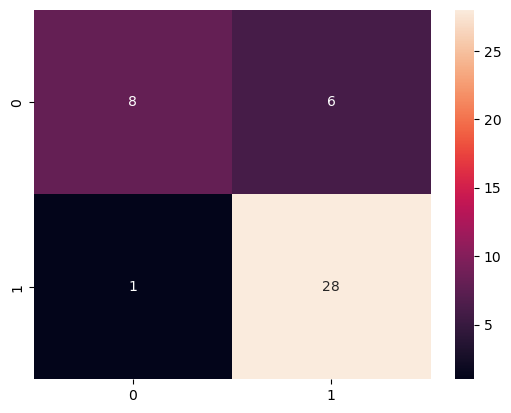

In [89]:
## For Testing Data

acc_rf = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {acc_rf}")
print("*"*60)

sns.heatmap(confusion_matrix(ytest,ytest_pred),annot = True)

clf_rpt_rf = classification_report(ytest,ytest_pred)
print(f"Classification Report : \n",clf_rpt_rf)

### Random Forest with Hyperparameter Tunning

In [90]:
hyperparameters = {"criterion" : ["entropy","gini"],
                  "max_depth" : np.arange(2,12),
                  "min_samples_split" : np.arange(3,12),
                  "min_samples_leaf" : np.arange(2,12),
                  "n_estimators": np.arange(2,100)}

In [91]:
rscv = RandomizedSearchCV(rf_clf_model,hyperparameters,cv=5)
rscv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [92]:
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [93]:
rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       min_samples_split=9, n_estimators=67)

In [94]:
rf_clf_hyp = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=3)

rf_clf_hyp_model = rf_clf_hyp.fit(xtrain,ytrain)
rf_clf_hyp_model

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=3)

## Model Evaluation

In [ ]:
ytrain_pred_rfh = rf_clf_hyp_model.predict(xtrain)

Accuracy : 0.936046511627907
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        53
           1       0.92      1.00      0.96       119

    accuracy                           0.94       172
   macro avg       0.96      0.90      0.92       172
weighted avg       0.94      0.94      0.93       172

************************************************************


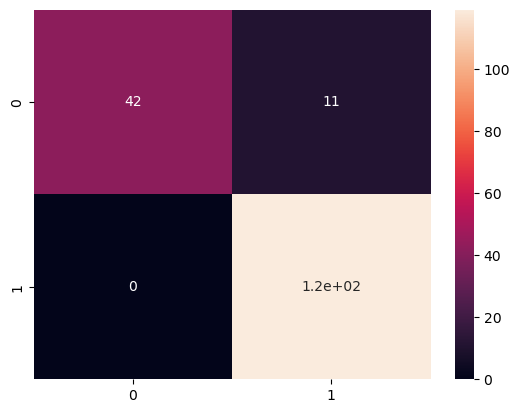

In [96]:
## For Training Data

acc_rh = accuracy_score(ytrain,ytrain_pred_rfh)
print(f"Accuracy : {acc_rh}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_pred_rfh),annot = True)


clf_rpt_rh = classification_report(ytrain,ytrain_pred_rfh)
print(f"Classification Report : \n",clf_rpt_rh)
print("*"*60)

In [99]:
ytest_pred_rfh = rf_clf_hyp_model.predict(xtest)

Accuracy : 0.8372093023255814
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        53
           1       0.92      1.00      0.96       119

    accuracy                           0.94       172
   macro avg       0.96      0.90      0.92       172
weighted avg       0.94      0.94      0.93       172



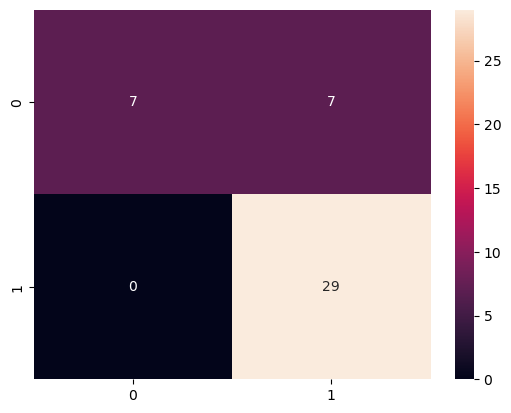

In [100]:
## For Testing Data

acc_rh = accuracy_score(ytest,ytest_pred_rfh)
print(f"Accuracy : {acc_rh}")
print("*"*60)

sns.heatmap(confusion_matrix(ytest,ytest_pred_rfh),annot = True)

clf_rpt = classification_report(ytest,ytest_pred_rfh)
print(f"Classification Report : \n",clf_rpt_rh)

# Algorithm 4) Ada Boost

## Model training

In [136]:
ab_clf = AdaBoostClassifier()
ab_clf

AdaBoostClassifier()

In [137]:
ab_clf_model = ab_clf.fit(xtrain,ytrain)
ab_clf_model

AdaBoostClassifier()

# Model Evaluation

In [141]:
## For Training Data

ytrain_predict = ab_clf_model.predict(xtrain)

Accuracy : 1.0
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00       119

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172

************************************************************


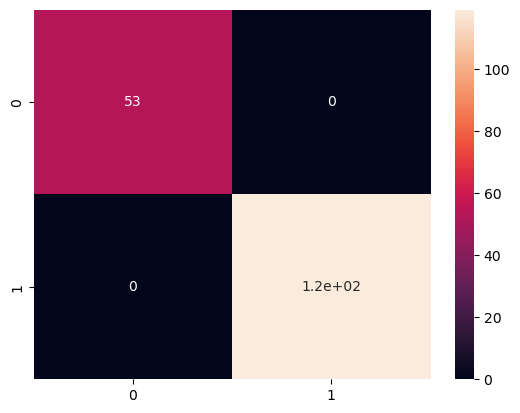

In [142]:
acc = accuracy_score(ytrain,ytrain_predict)
print(f"Accuracy : {acc}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_predict),annot = True)


clf_rpt = classification_report(ytrain,ytrain_predict)
print(f"Classification Report : \n",clf_rpt)
print("*"*60)

In [143]:
## For Testing Data

ytest_predict = ab_clf_model.predict(xtest)

Accuracy : 0.7441860465116279
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.78      0.86      0.82        29

    accuracy                           0.74        43
   macro avg       0.71      0.68      0.69        43
weighted avg       0.73      0.74      0.74        43



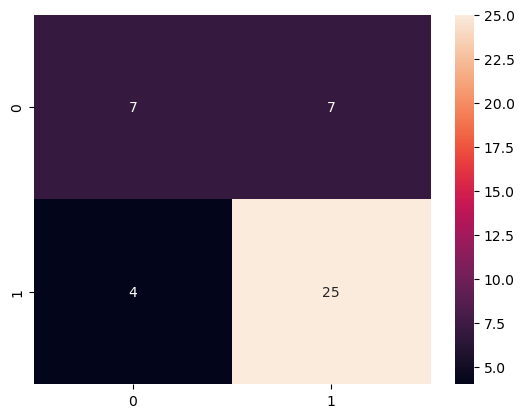

In [144]:
acu = accuracy_score(ytest,ytest_predict)
print(f"Accuracy : {acu}")
print("*"*60)

sns.heatmap(confusion_matrix(ytest,ytest_predict),annot = True)

clf_rpt = classification_report(ytest,ytest_predict)
print(f"Classification Report : \n",clf_rpt)

## Ada Boost with hyperparameter tunning

In [145]:
hyp = {"n_estimators" : np.arange(5,50),
    "learning_rate" : [0,0.1,0.01,1]}

In [146]:
rscv = RandomizedSearchCV(ab_clf_model,hyp,cv=4)
rscv.fit(xtrain,ytrain)

C:\Users\yashraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yashraj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yashraj\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 124, in fit
    self._validate_params()
  File "C:\Users\yashraj\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\yashraj\anaconda3

RandomizedSearchCV(cv=4, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0, 0.1, 0.01, 1],
                                        'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [147]:
rscv.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=34)

In [148]:
ab_clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=34)
ab_clf

AdaBoostClassifier(learning_rate=0.1, n_estimators=34)

In [149]:
ab_clf_hyp_model = ab_clf.fit(xtrain,ytrain)
ab_clf_hyp_model

AdaBoostClassifier(learning_rate=0.1, n_estimators=34)

## Model evaluation

In [150]:
## For Training Data

ytrain_predict = ab_clf_hyp_model.predict(xtrain)

Accuracy : 0.877906976744186
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.74      0.79        53
           1       0.89      0.94      0.91       119

    accuracy                           0.88       172
   macro avg       0.87      0.84      0.85       172
weighted avg       0.88      0.88      0.88       172

************************************************************


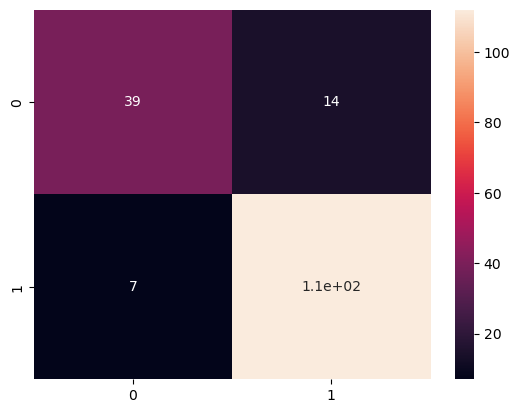

In [151]:
acr = accuracy_score(ytrain,ytrain_predict)
print(f"Accuracy : {acr}")
print("*"*60)

sns.heatmap(confusion_matrix(ytrain,ytrain_predict),annot = True)


clf_rpt = classification_report(ytrain,ytrain_predict)
print(f"Classification Report : \n",clf_rpt)
print("*"*60)

In [152]:
## For Testing Data

ytest_predict = ab_clf_hyp_model.predict(xtest)

Accuracy : 0.813953488372093
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.84      0.90      0.87        29

    accuracy                           0.81        43
   macro avg       0.79      0.77      0.78        43
weighted avg       0.81      0.81      0.81        43



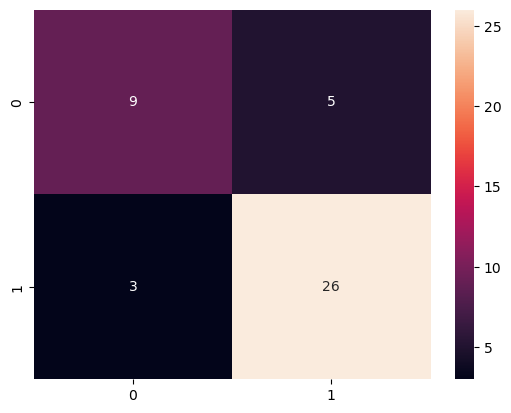

In [153]:
acr = accuracy_score(ytest,ytest_predict)
print(f"Accuracy : {acr}")
print("*"*60)

sns.heatmap(confusion_matrix(ytest,ytest_predict),annot = True)

clf_rpt = classification_report(ytest,ytest_predict)
print(f"Classification Report : \n",clf_rpt)

# Saving Model

In [103]:
import pickle

In [104]:
with open("placement_pred_model.pkl","wb") as f:
    pickle.dump(rf_clf_hyp_model,f)

In [105]:
# Taking input

In [107]:
def placement_prediction_dt(ssc_p,hsc_p,degree_p,degree_t,workex,etest_p,specialisation,mba_p):
    test_df_ = pd.DataFrame({"ssc_p":ssc_p,
                           "hsc_p":hsc_p,
                            "degree_p":degree_p,
                           "degree_t":degree_t,
                           "workex":workex,
                           "etest_p":etest_p,
                           "specialisation":specialisation,
                           "mba_p":mba_p},index=[0])
    
    with open("placement_pred_model.pkl","rb") as f:
        final_model = pickle.load(f)
        
    predictions = final_model.predict(test_df_)
    if predictions[0] == 0:
        print(f"Student is not Placed")
    else:
        print(f"Students is Placed")
    
    

In [108]:
placement_prediction_dt(70.00,85.00,60.00,1,0,65.0,1,48.80)

Students is Placed


In [109]:
placement_prediction_dt(40.00,55.00,50.00,2,1,95.0,0,88.80)

Student is not Placed
